In [2]:
import pandas as pd

## Load Dataset

In [3]:
# 경로(ex: data/train.csv)는 사용자 설정마다 다름
train = pd.read_csv("train.csv", parse_dates=["datetime"])

# train["datetime"].dt.year # (month / day / hour / minute / second)

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train["humidity"].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

In [7]:
train.loc[train["humidity"] <=20, "humidity_cate"] = 0
train.loc[(train["humidity"] >20 )& (train["humidity"] <=40), "humidity_cate"] = 1
train.loc[(train["humidity"] >40 )& (train["humidity"] <=60), "humidity_cate"] = 2
train.loc[(train["humidity"] >60 )& (train["humidity"] <=80), "humidity_cate"] = 3
train.loc[(train["humidity"] >80 )& (train["humidity"] <=100), "humidity_cate"] = 4

In [8]:
test = pd.read_csv("test.csv", parse_dates=["datetime"])

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Preprocessing

### Parse datetime

In [9]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(10886, 20)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5


In [10]:
test["datetime-year"] = test["datetime"].dt.year
test["datetime-month"] = test["datetime"].dt.month
test["datetime-day"] = test["datetime"].dt.day
test["datetime-hour"] = test["datetime"].dt.hour
test["datetime-minute"] = test["datetime"].dt.minute
test["datetime-second"] = test["datetime"].dt.second
test["datetime-dayofweek"] = test["datetime"].dt.dayofweek

print(test.shape)
test[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second", "datetime-dayofweek"]].head()

(6493, 16)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek
0,2011-01-20 00:00:00,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,2011,1,20,4,0,0,3


## Explore

In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### datetime

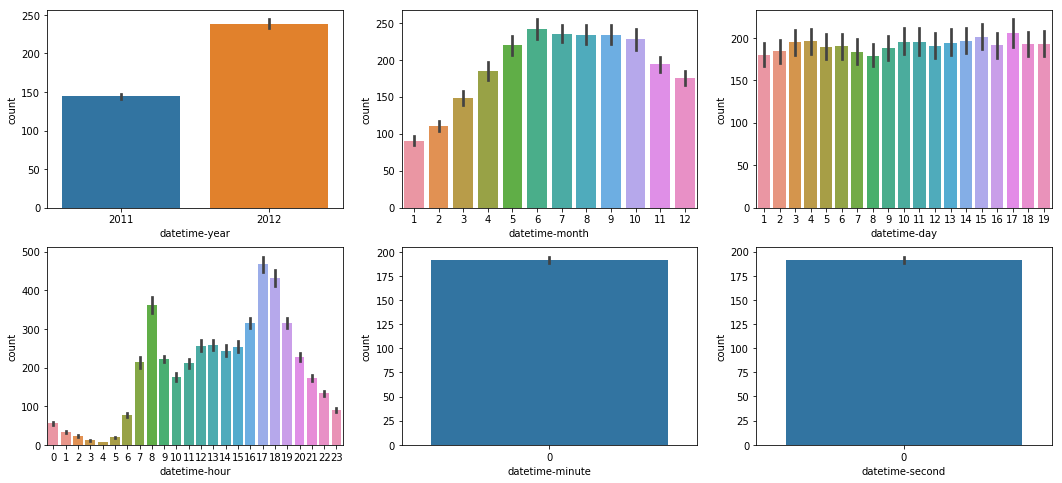

In [12]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

In [13]:
train["datetime-year_month"] = train["datetime"].dt.year.astype('str') + "-" + train["datetime"].dt.month.astype('str')

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 21)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


In [14]:
test["datetime-year_month"] = test["datetime"].dt.year.astype('str') + "-" + test["datetime"].dt.month.astype('str')

print(test.shape)
test[["datetime", "datetime-year_month"]].head()

(6493, 17)


,datetime,datetime-year_month
0,2011-01-20 00:00:00,2011-1
1,2011-01-20 01:00:00,2011-1
2,2011-01-20 02:00:00,2011-1
3,2011-01-20 03:00:00,2011-1
4,2011-01-20 04:00:00,2011-1


In [15]:
test["2011-01"] = test["datetime-year_month"] == "2011-1"
test["2011-02"] = test["datetime-year_month"] == "2011-2"
test["2011-03"] = test["datetime-year_month"] == "2011-3"
test["2011-04"] = test["datetime-year_month"] == "2011-4"
test["2011-05"] = test["datetime-year_month"] == "2011-5"
test["2011-06"] = test["datetime-year_month"] == "2011-6"
test["2011-07"] = test["datetime-year_month"] == "2011-7"
test["2011-08"] = test["datetime-year_month"] == "2011-8"
test["2011-09"] = test["datetime-year_month"] == "2011-9"
test["2011-10"] = test["datetime-year_month"] == "2011-10"
test["2011-11"] = test["datetime-year_month"] == "2011-11"
test["2011-12"] = test["datetime-year_month"] == "2011-12"
test["2012-01"] = test["datetime-year_month"] == "2012-1"
test["2012-02"] = test["datetime-year_month"] == "2012-2"
test["2012-03"] = test["datetime-year_month"] == "2012-3"
test["2012-04"] = test["datetime-year_month"] == "2012-4"
test["2012-05"] = test["datetime-year_month"] == "2012-5"
test["2012-06"] = test["datetime-year_month"] == "2012-6"
test["2012-07"] = test["datetime-year_month"] == "2012-7"
test["2012-08"] = test["datetime-year_month"] == "2012-8"
test["2012-09"] = test["datetime-year_month"] == "2012-9"
test["2012-10"] = test["datetime-year_month"] == "2012-10"
test["2012-11"] = test["datetime-year_month"] == "2012-11"
test["2012-12"] = test["datetime-year_month"] == "2012-12"

In [16]:
train["datetime-year_hour"] = train["datetime"].dt.year.astype('str') + "-" + train["datetime"].dt.hour.astype('str')

print(train.shape)
train[["datetime", "datetime-year_hour"]].head()

(10886, 22)


,datetime,datetime-year_hour
0,2011-01-01 00:00:00,2011-0
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-2
3,2011-01-01 03:00:00,2011-3
4,2011-01-01 04:00:00,2011-4


In [17]:
train["2011-00"] = train["datetime-year_hour"] == "2011-0"
train["2011-01"] = train["datetime-year_hour"] == "2011-1"
train["2011-02"] = train["datetime-year_hour"] == "2011-2"
train["2011-03"] = train["datetime-year_hour"] == "2011-3"
train["2011-04"] = train["datetime-year_hour"] == "2011-4"
train["2011-05"] = train["datetime-year_hour"] == "2011-5"
train["2011-06"] = train["datetime-year_hour"] == "2011-6"
train["2011-07"] = train["datetime-year_hour"] == "2011-7"
train["2011-08"] = train["datetime-year_hour"] == "2011-8"
train["2011-09"] = train["datetime-year_hour"] == "2011-9"
train["2011-10"] = train["datetime-year_hour"] == "2011-10"
train["2011-11"] = train["datetime-year_hour"] == "2011-11"
train["2011-12"] = train["datetime-year_hour"] == "2011-12"
train["2011-13"] = train["datetime-year_hour"] == "2011-13"
train["2011-14"] = train["datetime-year_hour"] == "2011-14"
train["2011-15"] = train["datetime-year_hour"] == "2011-15"
train["2011-16"] = train["datetime-year_hour"] == "2011-16"
train["2011-17"] = train["datetime-year_hour"] == "2011-17"
train["2011-18"] = train["datetime-year_hour"] == "2011-18"
train["2011-19"] = train["datetime-year_hour"] == "2011-19"
train["2011-20"] = train["datetime-year_hour"] == "2011-20"
train["2011-21"] = train["datetime-year_hour"] == "2011-21"
train["2011-22"] = train["datetime-year_hour"] == "2011-22"
train["2011-23"] = train["datetime-year_hour"] == "2011-23"

train["2012-00"] = train["datetime-year_hour"] == "2012-0"
train["2012-01"] = train["datetime-year_hour"] == "2012-1"
train["2012-02"] = train["datetime-year_hour"] == "2012-2"
train["2012-03"] = train["datetime-year_hour"] == "2012-3"
train["2012-04"] = train["datetime-year_hour"] == "2012-4"
train["2012-05"] = train["datetime-year_hour"] == "2012-5"
train["2012-06"] = train["datetime-year_hour"] == "2012-6"
train["2012-07"] = train["datetime-year_hour"] == "2012-7"
train["2012-08"] = train["datetime-year_hour"] == "2012-8"
train["2012-09"] = train["datetime-year_hour"] == "2012-9"
train["2012-10"] = train["datetime-year_hour"] == "2012-10"
train["2012-11"] = train["datetime-year_hour"] == "2012-11"
train["2012-12"] = train["datetime-year_hour"] == "2012-12"
train["2012-13"] = train["datetime-year_hour"] == "2012-13"
train["2012-14"] = train["datetime-year_hour"] == "2012-14"
train["2012-15"] = train["datetime-year_hour"] == "2012-15"
train["2012-16"] = train["datetime-year_hour"] == "2012-16"
train["2012-17"] = train["datetime-year_hour"] == "2012-17"
train["2012-18"] = train["datetime-year_hour"] == "2012-18"
train["2012-19"] = train["datetime-year_hour"] == "2012-19"
train["2012-20"] = train["datetime-year_hour"] == "2012-20"
train["2012-21"] = train["datetime-year_hour"] == "2012-21"
train["2012-22"] = train["datetime-year_hour"] == "2012-22"
train["2012-23"] = train["datetime-year_hour"] == "2012-23"

In [18]:
test["datetime-year_hour"] = test["datetime"].dt.year.astype('str') + "-" + test["datetime"].dt.hour.astype('str')

print(test.shape)
test[["datetime", "datetime-year_hour"]].head()

(6493, 42)


,datetime,datetime-year_hour
0,2011-01-20 00:00:00,2011-0
1,2011-01-20 01:00:00,2011-1
2,2011-01-20 02:00:00,2011-2
3,2011-01-20 03:00:00,2011-3
4,2011-01-20 04:00:00,2011-4


In [19]:
test["2011-00"] = test["datetime-year_hour"] == "2011-0"
test["2011-01"] = test["datetime-year_hour"] == "2011-1"
test["2011-02"] = test["datetime-year_hour"] == "2011-2"
test["2011-03"] = test["datetime-year_hour"] == "2011-3"
test["2011-04"] = test["datetime-year_hour"] == "2011-4"
test["2011-05"] = test["datetime-year_hour"] == "2011-5"
test["2011-06"] = test["datetime-year_hour"] == "2011-6"
test["2011-07"] = test["datetime-year_hour"] == "2011-7"
test["2011-08"] = test["datetime-year_hour"] == "2011-8"
test["2011-09"] = test["datetime-year_hour"] == "2011-9"
test["2011-10"] = test["datetime-year_hour"] == "2011-10"
test["2011-11"] = test["datetime-year_hour"] == "2011-11"
test["2011-12"] = test["datetime-year_hour"] == "2011-12"
test["2011-13"] = test["datetime-year_hour"] == "2011-13"
test["2011-14"] = test["datetime-year_hour"] == "2011-14"
test["2011-15"] = test["datetime-year_hour"] == "2011-15"
test["2011-16"] = test["datetime-year_hour"] == "2011-16"
test["2011-17"] = test["datetime-year_hour"] == "2011-17"
test["2011-18"] = test["datetime-year_hour"] == "2011-18"
test["2011-19"] = test["datetime-year_hour"] == "2011-19"
test["2011-20"] = test["datetime-year_hour"] == "2011-20"
test["2011-21"] = test["datetime-year_hour"] == "2011-21"
test["2011-22"] = test["datetime-year_hour"] == "2011-22"
test["2011-23"] = test["datetime-year_hour"] == "2011-23"

test["2012-00"] = test["datetime-year_hour"] == "2012-0"
test["2012-01"] = test["datetime-year_hour"] == "2012-1"
test["2012-02"] = test["datetime-year_hour"] == "2012-2"
test["2012-03"] = test["datetime-year_hour"] == "2012-3"
test["2012-04"] = test["datetime-year_hour"] == "2012-4"
test["2012-05"] = test["datetime-year_hour"] == "2012-5"
test["2012-06"] = test["datetime-year_hour"] == "2012-6"
test["2012-07"] = test["datetime-year_hour"] == "2012-7"
test["2012-08"] = test["datetime-year_hour"] == "2012-8"
test["2012-09"] = test["datetime-year_hour"] == "2012-9"
test["2012-10"] = test["datetime-year_hour"] == "2012-10"
test["2012-11"] = test["datetime-year_hour"] == "2012-11"
test["2012-12"] = test["datetime-year_hour"] == "2012-12"
test["2012-13"] = test["datetime-year_hour"] == "2012-13"
test["2012-14"] = test["datetime-year_hour"] == "2012-14"
test["2012-15"] = test["datetime-year_hour"] == "2012-15"
test["2012-16"] = test["datetime-year_hour"] == "2012-16"
test["2012-17"] = test["datetime-year_hour"] == "2012-17"
test["2012-18"] = test["datetime-year_hour"] == "2012-18"
test["2012-19"] = test["datetime-year_hour"] == "2012-19"
test["2012-20"] = test["datetime-year_hour"] == "2012-20"
test["2012-21"] = test["datetime-year_hour"] == "2012-21"
test["2012-22"] = test["datetime-year_hour"] == "2012-22"
test["2012-23"] = test["datetime-year_hour"] == "2012-23"

In [20]:
## train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

train["datetime-year_dayofweek"] = train["datetime"].dt.year.astype('str') + "--" + train["datetime"].dt.dayofweek.astype('str')

print(train.shape)
train[["datetime", "datetime-year_dayofweek"]].head(10)

(10886, 71)


,datetime,datetime-year_dayofweek
0,2011-01-01 00:00:00,2011--5
1,2011-01-01 01:00:00,2011--5
2,2011-01-01 02:00:00,2011--5
3,2011-01-01 03:00:00,2011--5
4,2011-01-01 04:00:00,2011--5
5,2011-01-01 05:00:00,2011--5
6,2011-01-01 06:00:00,2011--5
7,2011-01-01 07:00:00,2011--5
8,2011-01-01 08:00:00,2011--5
9,2011-01-01 09:00:00,2011--5


In [21]:
train["2011--01"] = train["datetime-year_hour"] == "2011--1"
train["2011--02"] = train["datetime-year_hour"] == "2011--2"
train["2011--03"] = train["datetime-year_hour"] == "2011--3"
train["2011--04"] = train["datetime-year_hour"] == "2011--4"
train["2011--05"] = train["datetime-year_hour"] == "2011--5"
train["2011--06"] = train["datetime-year_hour"] == "2011--6"
train["2011--07"] = train["datetime-year_hour"] == "2011--7"

train["2012--01"] = train["datetime-year_hour"] == "2012--1"
train["2012--02"] = train["datetime-year_hour"] == "2012--2"
train["2012--03"] = train["datetime-year_hour"] == "2012--3"
train["2012--04"] = train["datetime-year_hour"] == "2012--4"
train["2012--05"] = train["datetime-year_hour"] == "2012--5"
train["2012--06"] = train["datetime-year_hour"] == "2012--6"
train["2012--07"] = train["datetime-year_hour"] == "2012--7"

In [22]:
test["datetime-year_dayofweek"] = test["datetime"].dt.year.astype('str') + "--" + test["datetime"].dt.dayofweek.astype('str')

print(test.shape)
test[["datetime", "datetime-year_dayofweek"]].head()

(6493, 67)


,datetime,datetime-year_dayofweek
0,2011-01-20 00:00:00,2011--3
1,2011-01-20 01:00:00,2011--3
2,2011-01-20 02:00:00,2011--3
3,2011-01-20 03:00:00,2011--3
4,2011-01-20 04:00:00,2011--3


In [23]:
test["2011--01"] = test["datetime-year_hour"] == "2011--1"
test["2011--02"] = test["datetime-year_hour"] == "2011--2"
test["2011--03"] = test["datetime-year_hour"] == "2011--3"
test["2011--04"] = test["datetime-year_hour"] == "2011--4"
test["2011--05"] = test["datetime-year_hour"] == "2011--5"
test["2011--06"] = test["datetime-year_hour"] == "2011--6"
test["2011--07"] = test["datetime-year_hour"] == "2011--7"

test["2012--01"] = test["datetime-year_hour"] == "2012--1"
test["2012--02"] = test["datetime-year_hour"] == "2012--2"
test["2012--03"] = test["datetime-year_hour"] == "2012--3"
test["2012--04"] = test["datetime-year_hour"] == "2012--4"
test["2012--05"] = test["datetime-year_hour"] == "2012--5"
test["2012--06"] = test["datetime-year_hour"] == "2012--6"
test["2012--07"] = test["datetime-year_hour"] == "2012--7"

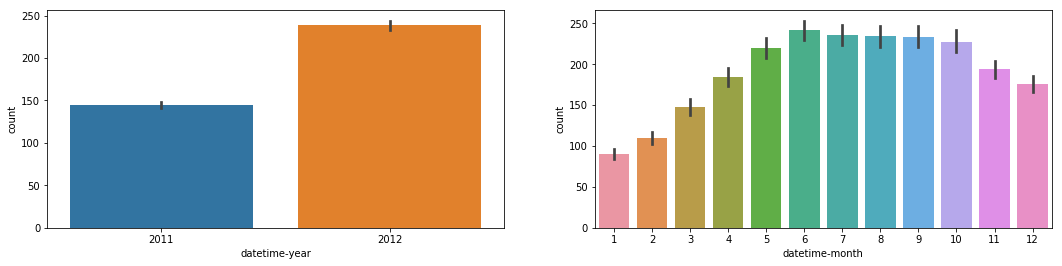

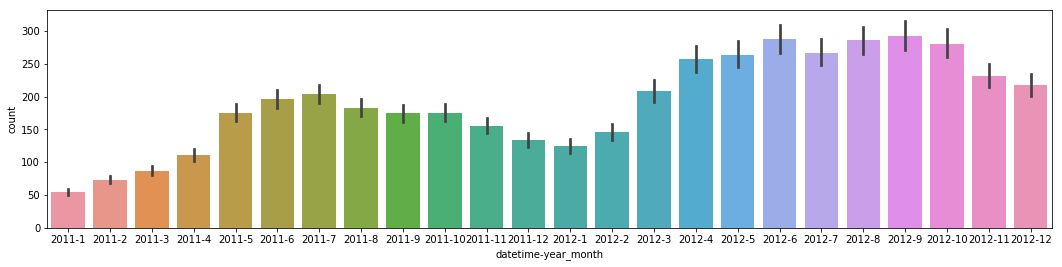

In [24]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)


figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

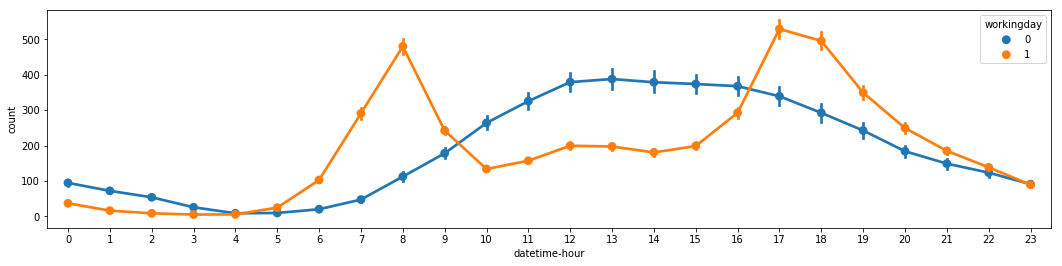

In [25]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)

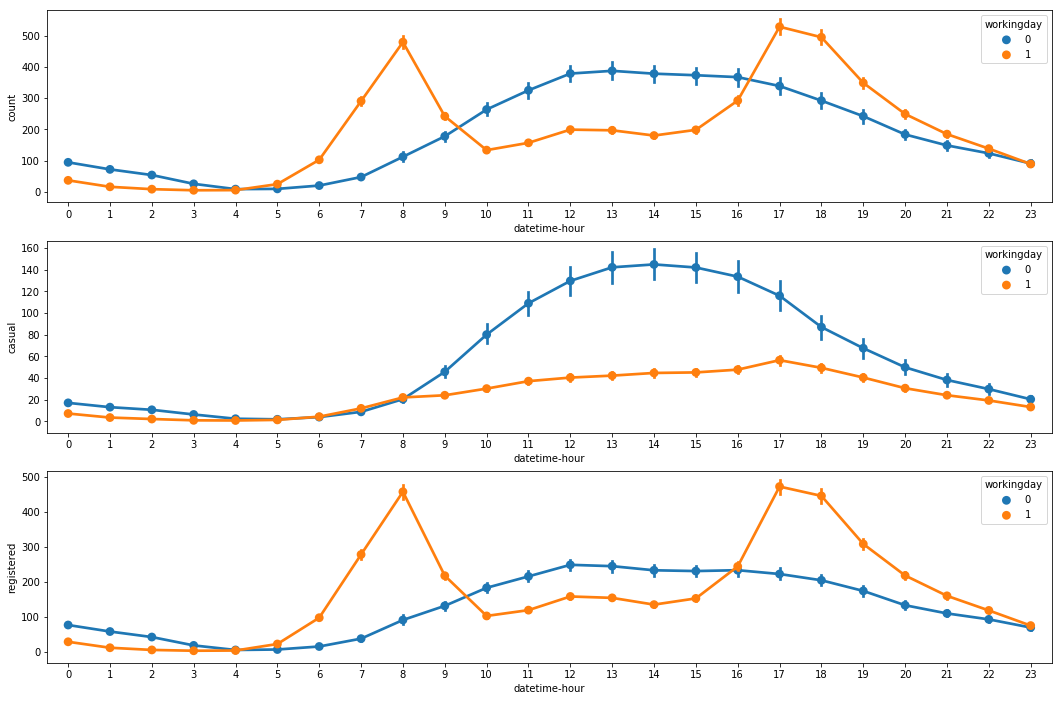

In [26]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(18, 12)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="casual", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="datetime-hour", y="registered", hue="workingday", ax=ax3)

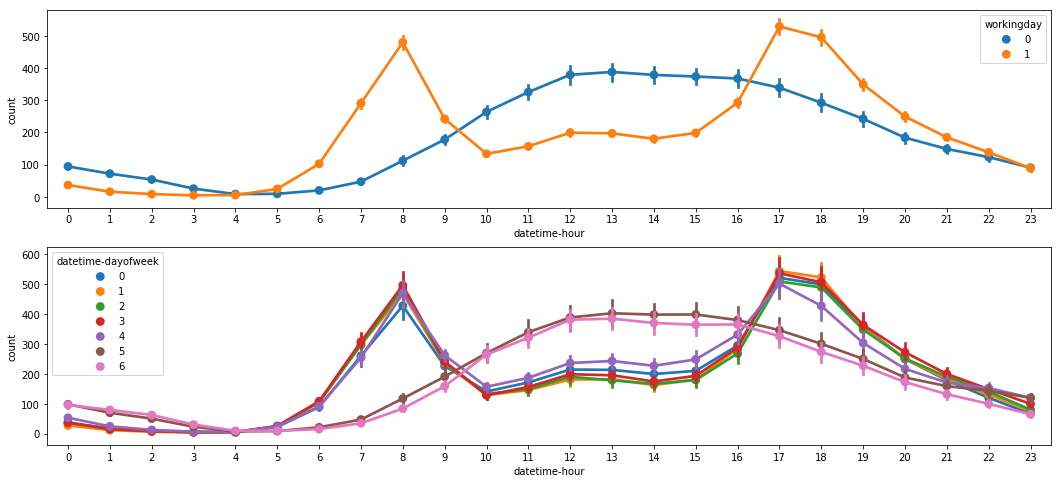

In [27]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax2)

## Weather

In [28]:
weather1 = train["weather"] == 1 
windspeed1 = train["windspeed"] > 0
season1 = train["season"] == 1
train[weather1 & windspeed1 & season1]["windspeed"].mean()

17.191688136645883

In [29]:
train.loc[(train["windspeed"] == 0) & (train["weather"] == 1) & (train["season"] == 1), "windspeed"] = 17.192
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,2011--05,2011--06,2011--07,2012--01,2012--02,2012--03,2012--04,2012--05,2012--06,2012--07
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,17.192,3,...,False,False,False,False,False,False,False,False,False,False
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,17.192,8,...,False,False,False,False,False,False,False,False,False,False
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,17.192,5,...,False,False,False,False,False,False,False,False,False,False
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,17.192,3,...,False,False,False,False,False,False,False,False,False,False
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,17.192,0,...,False,False,False,False,False,False,False,False,False,False


In [30]:
weather1 = train["weather"] == 1 
windspeed1 = train["windspeed"] > 0
season2 = train["season"] == 2
train[weather1 & windspeed1 & season2]["windspeed"].mean()

14.866625419515112

In [31]:
train.loc[(train["windspeed"] == 0) & (train["weather"] == 1) & (train["season"] == 2), "windspeed"] = 14.867

In [32]:
weather1 = train["weather"] == 1 
windspeed1 = train["windspeed"] > 0
season3 = train["season"] == 3
train[weather1 & windspeed1 & season3]["windspeed"].mean()

12.960873835125334

In [33]:
train.loc[(train["windspeed"] == 0) & (train["weather"] == 1) & (train["season"] == 3), "windspeed"] = 12.961

In [34]:
weather1 = train["weather"] == 1 
windspeed1 = train["windspeed"] > 0
season4 = train["season"] == 4
train[weather1 & windspeed1 & season4]["windspeed"].mean()

13.896739341916936

In [35]:
train.loc[(train["windspeed"] == 0) & (train["weather"] == 1) & (train["season"] == 4), "windspeed"] = 13.897

In [36]:
weather2 = train["weather"] == 2 
weather3 = train["weather"] == 3 
weather4 = train["weather"] == 4 

print(train[weather2 & windspeed1 & season1]["windspeed"].mean())
print(train[weather2 & windspeed1 & season2]["windspeed"].mean())
print(train[weather2 & windspeed1 & season3]["windspeed"].mean())
print(train[weather2 & windspeed1 & season4]["windspeed"].mean())

14.455550641025626
14.235827596899188
13.002209622641484
13.521244045911052


In [37]:
train.loc[(train["windspeed"] == 0) & (train["weather"] == 2) & (train["season"] == 1), "windspeed"] = 14.455
train.loc[(train["windspeed"] == 0) & (train["weather"] == 2) & (train["season"] == 2), "windspeed"] = 14.236
train.loc[(train["windspeed"] == 0) & (train["weather"] == 2) & (train["season"] == 3), "windspeed"] = 13.002
train.loc[(train["windspeed"] == 0) & (train["weather"] == 2) & (train["season"] == 4), "windspeed"] = 13.521

In [38]:
print(train[weather3 & windspeed1 & season1]["windspeed"].mean())
print(train[weather3 & windspeed1 & season2]["windspeed"].mean())
print(train[weather3 & windspeed1 & season3]["windspeed"].mean())
print(train[weather3 & windspeed1 & season4]["windspeed"].mean())

13.883184042553205
16.753619905213252
16.011427932960892
14.860405797101448


In [39]:
train.loc[(train["windspeed"] == 0) & (train["weather"] == 3) & (train["season"] == 1), "windspeed"] = 13.883
train.loc[(train["windspeed"] == 0) & (train["weather"] == 3) & (train["season"] == 2), "windspeed"] = 16.754
train.loc[(train["windspeed"] == 0) & (train["weather"] == 3) & (train["season"] == 3), "windspeed"] = 16.011
train.loc[(train["windspeed"] == 0) & (train["weather"] == 3) & (train["season"] == 4), "windspeed"] = 14.860

In [40]:
print(train[weather4 & windspeed1 & season1]["windspeed"].mean())
print(train[weather4 & windspeed1 & season2]["windspeed"].mean())
print(train[weather4 & windspeed1 & season3]["windspeed"].mean())
print(train[weather4 & windspeed1 & season4]["windspeed"].mean())

6.0032
nan
nan
nan


In [41]:
train.loc[(train["windspeed"] == 0) & (train["weather"] == 4) & (train["season"] == 1), "windspeed"] = 6.0032

## Feeling 

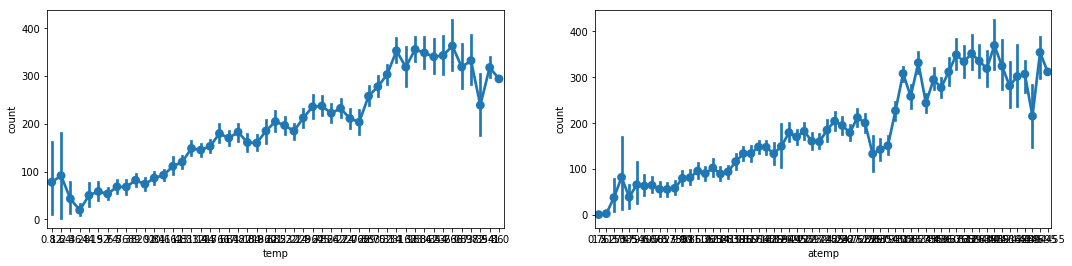

In [42]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="temp", y="count", ax=ax1)
sns.pointplot(data=train, x="atemp", y="count", ax=ax2)



In [43]:
train["avg_temp"] = (train["temp"] + train["atemp"]) / 2
train["avg_temp"].head()

0    12.1175
1    11.3275
2    11.3275
3    12.1175
4    12.1175
Name: avg_temp, dtype: float64

In [44]:
test["avg_temp"] = (test["temp"] + test["atemp"]) / 2
test["avg_temp"].head()

0    11.0125
1    12.1475
2    12.1475
3    11.7700
4    11.7700
Name: avg_temp, dtype: float64

In [45]:
train["avg_temp"].describe()

count    10886.000000
mean        21.942972
std          8.102487
min          0.790000
25%         15.302500
50%         22.370000
75%         28.302500
max         42.407500
Name: avg_temp, dtype: float64

In [46]:
train.loc[train["avg_temp"] <=10, "avg_temp_cate"] = 0
train.loc[(train["avg_temp"] >10 )& (train["avg_temp"] <=20), "avg_temp_cate"] = 1
train.loc[(train["avg_temp"] >20 )& (train["avg_temp"] <=30), "avg_temp_cate"] = 2
train.loc[(train["avg_temp"] >30 )& (train["avg_temp"] <=40), "avg_temp_cate"] = 3
train.loc[(train["avg_temp"] >40 )& (train["avg_temp"] <=50), "avg_temp_cate"] = 4

In [ ]:
test.loc[test["avg_temp"] <=10, "avg_temp_cate"] = 0
test.loc[(test["avg_temp"] >10 )& (test["avg_temp"] <=20), "avg_temp_cate"] = 1
test.loc[(test["avg_temp"] >20 )& (test["avg_temp"] <=30), "avg_temp_cate"] = 2
test.loc[(test["avg_temp"] >30 )& (test["avg_temp"] <=40), "avg_temp_cate"] = 3
test.loc[(test["avg_temp"] >40 )& (test["avg_temp"] <=50), "avg_temp_cate"] = 4

## Humidity

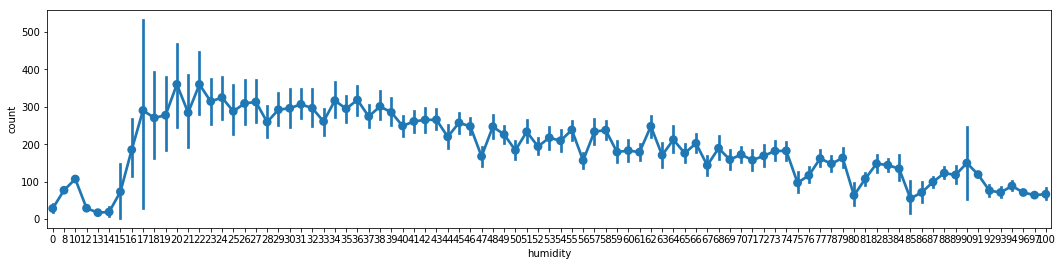

In [143]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="humidity", y="count", ax=ax1)




In [144]:
train["humidity"].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

## Train

In [289]:
feature_names = ["season", "holiday", "weather",
                  "humidity", "windspeed",
                 "datetime-year", "avg_temp", "datetime-year_hour", "datetime-year_day", "Workingday"]
                
feature_names

['season',
 'holiday',
 'weather',
 'humidity',
 'windspeed',
 'datetime-year',
 'avg_temp',
 'datetime-year_hour',
 'datetime-year_day',
 'Workingday']

In [290]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

KeyError: "['datetime-year_day' 'Workingday'] not in index"

In [271]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 21)


,season,holiday,weather,humidity,windspeed,datetime-year,avg_temp,2011--01,2011--02,2011--03,...,2011--05,2011--06,2011--07,2012--01,2012--02,2012--03,2012--04,2012--05,2012--06,2012--07
0,1,0,1,56,26.0027,2011,11.0125,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,0,1,56,0.0000,2011,12.1475,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0,1,56,0.0000,2011,12.1475,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0,1,56,11.0014,2011,11.7700,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,0,1,56,11.0014,2011,11.7700,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [272]:
label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [273]:
label_name_c = "casual"

y_train_c = train[label_name_c]

print(y_train_c.shape)
y_train_c.head()

(10886,)


0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

In [274]:
label_name_r = "registered"

y_train_r = train[label_name_r]

print(y_train_r.shape)
y_train_r.head()

(10886,)


0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

In [275]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=37)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [276]:
from sklearn.ensemble import RandomForestRegressor

model_c = RandomForestRegressor(random_state=37)
model_c

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [277]:
from sklearn.ensemble import RandomForestRegressor

model_r = RandomForestRegressor(random_state=37)
model_r

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

## Score

Evaluation Metrics = [Root Mean Squared Logarithmic Error (RMSLE)](https://www.kaggle.com/c/bike-sharing-demand#evaluation)


$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [240]:
import numpy as np
from sklearn.metrics import make_scorer

def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [173]:
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train,
                        cv=20, scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(score))

ValueError: could not convert string to float: '2012-2'

In [278]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [279]:
model_c.fit(X_train, y_train_c)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [280]:
model_r.fit(X_train, y_train_r)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

In [281]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions

(6493,)


array([ 67.6,  18.8,  18.8, ..., 119.6,  77.5, 119.9])

In [282]:
predictions_c = model_c.predict(X_test)

print(predictions_c.shape)
predictions_c

(6493,)


array([2.6 , 3.5 , 3.5 , ..., 9.05, 5.37, 9.1 ])

In [283]:
predictions_r = model_r.predict(X_test)

print(predictions_r.shape)
predictions_r

(6493,)


array([121.9 ,  22.  ,  22.  , ..., 118.64,  86.7 ,  76.65])

## Submit

In [251]:
submission = pd.read_csv("sampleSubmission.csv")

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [252]:
submission["count"] = predictions_c + predictions_r

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,119.050000
1,2011-01-20 01:00:00,77.566667
2,2011-01-20 02:00:00,77.566667
3,2011-01-20 03:00:00,123.600000
4,2011-01-20 04:00:00,123.600000


In [231]:
submission.to_csv("baseline-script.csv", index=False)